### LCC. Abraham Cisneros Valladolid


## Esta práctica está enfocada en el aumento de datos para las imágenes.

## Recordando que el aumento de datos en imágenes es una técnica que crea variedad en un conjunto de imágenes existente, mejorando así la capacidad de un modelo de inteligencia artificial para aprender y generalizar patrones a partir de datos limitados.


Fuente: https://towardsdatascience.com/data-augmentation-and-handling-huge-datasets-with-keras-a-simple-way-240481069376

# 1 - Importar librerias

Estas son las librerias que se usarán para trabajar con este notebook.

In [2]:
import tensorflow as tf
import keras
import numpy as np
import glob
import matplotlib.pyplot as plt
from google.colab import files
import matplotlib.image as mpimg

# 2 - Establecer los parametros de trabajo

Por defecto muchas de estas opciones vienen activadas, sin embargo, el proposito de esta práctica es mostrar como cada parametro puede generar y aumentar de una manera en especifica las imagenes.

In [3]:
tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    zca_epsilon=1e-06,
    rotation_range=0,
    width_shift_range=0.0,
    height_shift_range=0.0,
    brightness_range=None,
    shear_range=0.0,
    zoom_range=0.0,
    channel_shift_range=0.0,
    fill_mode="nearest",
    cval=0.0,
    horizontal_flip=False,
    vertical_flip=False,
    rescale=None,
    preprocessing_function=None,
    data_format=None,
    validation_split=0.0,
    dtype=None,
)

Esta será la imagen con la que vamos a trabajar.

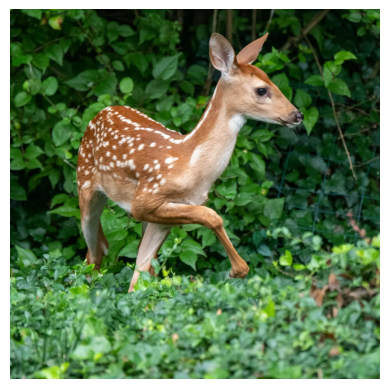

In [3]:
imagen = mpimg.imread('venado.jpeg')
plt.imshow(imagen)
plt.axis('off')
plt.show()

# 3 - Aumento del desplazamiento vertical y horizontal

El aumento del desplazamiento vertical y horizontal implica mover una imagen hacia arriba, abajo, izquierda o derecha para crear versiones ligeramente diferentes. Esto ayuda a entrenar modelos de inteligencia artificial para reconocer objetos desde diversas perspectivas y ubicaciones en las imágenes.

En esta sección se selecciona la imagen que se usara, al mismo tiempo donde se depositaran las imagenes generadas, del mismo modo con la función **ImageDataGenerator** establecemos los parametros que querremos.

In [4]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img

IMAGE_PATH = 'venado.jpeg'
OUTPUT_DIRECTORY = '/content/output_desplazamiento'
image = load_img(IMAGE_PATH)
image = img_to_array(image)
image = np.expand_dims(image, axis=0)

datagen = ImageDataGenerator(height_shift_range=0.2, width_shift_range=0.2)
PREFIX = 'Shifted'
imGen = datagen.flow(image, batch_size=1, save_to_dir = OUTPUT_DIRECTORY,
                    save_prefix=PREFIX, save_format='jpg')
for i in range(6):
    batch = imGen.next()

Finalmente seleccionamos las imagenes que fueron generadas para mostrarlas en una sola figura con **mathplotlib**

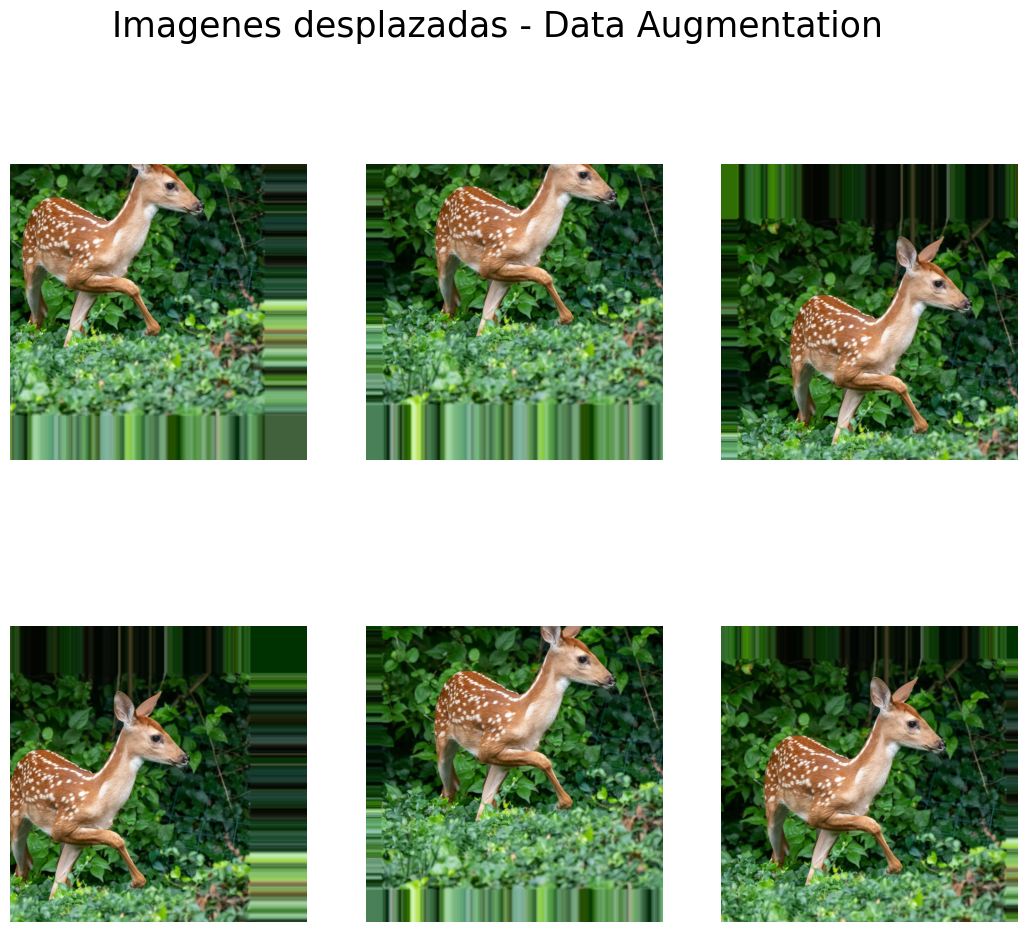

In [6]:
augmented_images = glob.glob('output_desplazamiento/{}_*.jpg'.format(PREFIX))
augmented_images
plt.figure(figsize=(13,11))
plt.suptitle('Imagenes desplazadas - Data Augmentation'.format(PREFIX), fontsize=25)
for i in range(len(augmented_images)):
    plt.subplot(2,3,i+1)
    image = load_img(augmented_images[i])
    image = img_to_array(image)
    image = image.astype('uint8')
    plt.axis('off')
    plt.imshow(image)
plt.savefig('output_desplazamiento/Display_{}_images.jpg'.format(PREFIX))
plt.show()

# 4 - Aumento de la rotación

El aumento de rotación consiste en girar una imagen en diferentes ángulos para crear variaciones en el conjunto de datos. Esto ayuda a entrenar modelos para reconocer objetos desde diferentes perspectivas.

In [5]:
IMAGE_PATH = 'venado.jpeg'
OUTPUT_DIRECTORY = '/content/output_rotacion'
image = load_img(IMAGE_PATH)
image = img_to_array(image)


image = np.expand_dims(image, axis=0)
datagen = ImageDataGenerator(rotation_range=30)
PREFIX = 'Rotated'
imGen = datagen.flow(image, batch_size=1, save_to_dir = OUTPUT_DIRECTORY,
save_prefix=PREFIX, save_format='jpg')
for i in range(6):
    batch = imGen.next()

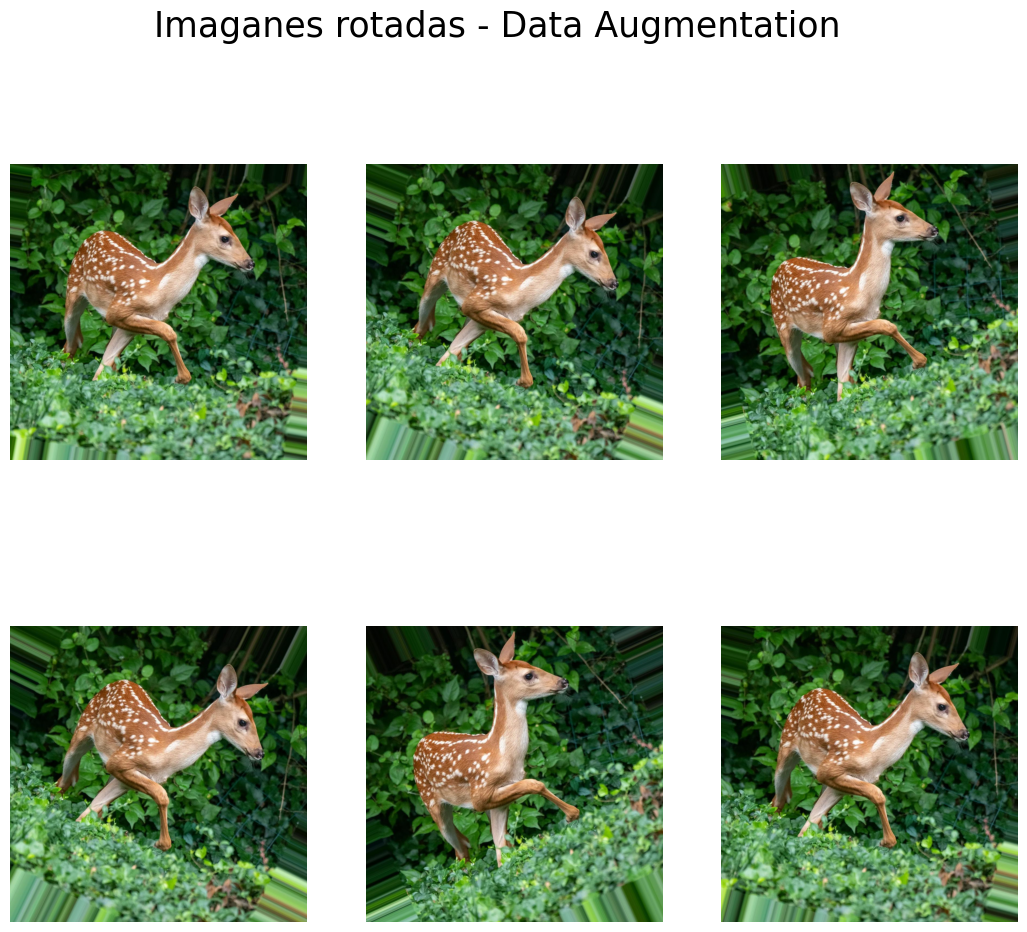

In [6]:
augmented_images = glob.glob('output_rotacion/{}_*.jpg'.format(PREFIX))
augmented_images
plt.figure(figsize=(13,11))
plt.suptitle('Imaganes rotadas - Data Augmentation'.format(PREFIX), fontsize=25)
for i in range(len(augmented_images)):
    plt.subplot(2,3,i+1)
    image = load_img(augmented_images[i])
    image = img_to_array(image)
    image = image.astype('uint8')
    plt.axis('off')
    plt.imshow(image)
plt.savefig('output_rotacion/Display_{}_images.jpg'.format(PREFIX))
plt.show()

# 5 Aumento de iluminación

El aumento con brillo ajusta la luminosidad de una imagen para entrenar modelos que puedan reconocer objetos en diferentes niveles de iluminación.

In [7]:
IMAGE_PATH = 'venado.jpeg'
OUTPUT_DIRECTORY = '/content/output_iluminacion'
image = load_img(IMAGE_PATH)
image = img_to_array(image)

image = np.expand_dims(image, axis=0)
datagen = ImageDataGenerator(brightness_range=(0.5,1.5))
PREFIX = 'Brightness'
imGen = datagen.flow(image, batch_size=1, save_to_dir = OUTPUT_DIRECTORY,
                     save_prefix=PREFIX, save_format='jpg')
for i in range(6):
    batch = imGen.next()

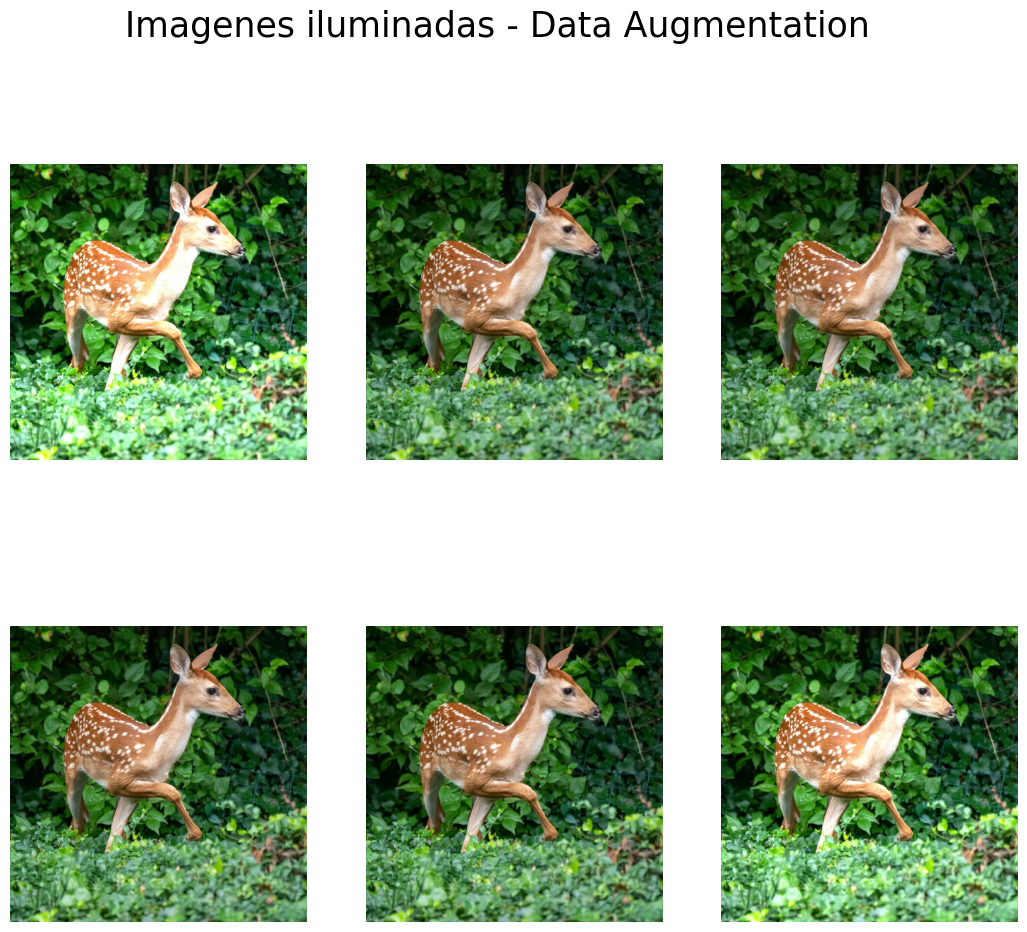

In [8]:
augmented_images = glob.glob('output_iluminacion/{}_*.jpg'.format(PREFIX))
augmented_images
plt.figure(figsize=(13,11))
plt.suptitle('Imagenes iluminadas - Data Augmentation'.format(PREFIX), fontsize=25)
for i in range(len(augmented_images)):
    plt.subplot(2,3,i+1)
    image = load_img(augmented_images[i])
    image = img_to_array(image)
    image = image.astype('uint8')
    plt.axis('off')
    plt.imshow(image)
plt.savefig('output_iluminacion/Display_{}_images.jpg'.format(PREFIX))
plt.show()

# (Extra) 6 - Aumento de acercamiento

El aumento por acercamiento implica crear imágenes nuevas recortando o ampliando partes de una imagen original a diferentes tamaños, lo que ayuda a entrenar modelos para reconocer objetos o patrones a diferentes escalas y niveles de detalle.

In [10]:
IMAGE_PATH = 'venado.jpeg'
OUTPUT_DIRECTORY = '/content/output_acercamiento'
image = load_img(IMAGE_PATH)
image = img_to_array(image)

image = np.expand_dims(image, axis=0)
datagen = ImageDataGenerator(zoom_range=1.5)
PREFIX = 'Zoom'
imGen = datagen.flow(image, batch_size=1, save_to_dir = OUTPUT_DIRECTORY,
                     save_prefix=PREFIX, save_format='jpg')
for i in range(6):
    batch = imGen.next()

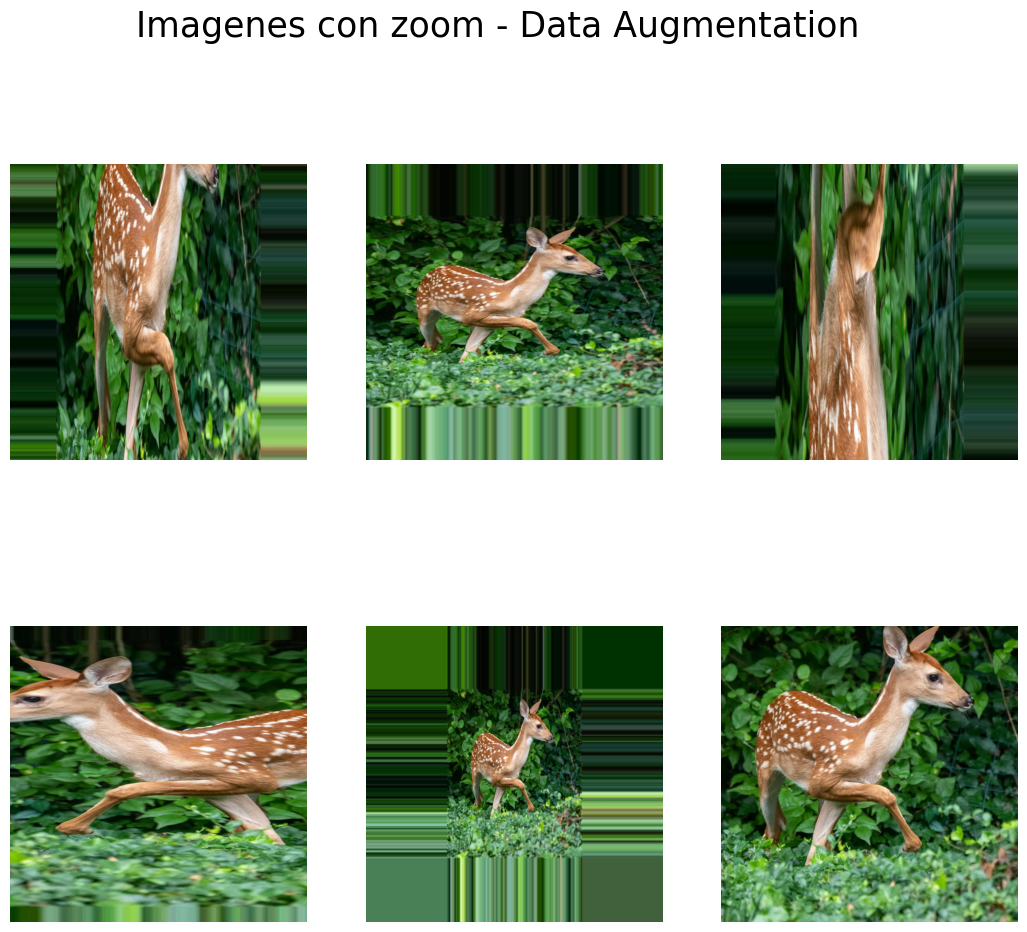

In [12]:
augmented_images = glob.glob('output_acercamiento/{}_*.jpg'.format(PREFIX))
augmented_images
plt.figure(figsize=(13,11))
plt.suptitle('Imagenes con zoom - Data Augmentation'.format(PREFIX), fontsize=25)
for i in range(len(augmented_images)):
    plt.subplot(2,3,i+1)
    image = load_img(augmented_images[i])
    image = img_to_array(image)
    image = image.astype('uint8')
    plt.axis('off')
    plt.imshow(image)
plt.savefig('output_acercamiento/Display_{}_images.jpg'.format(PREFIX))
plt.show()

# (Extra) 7 - Aumento multiple

El uso de múltiples aumentos implica aplicar varias técnicas de aumento de datos de manera simultánea o secuencial a un conjunto de datos de entrenamiento. Estas técnicas incluyen transformaciones como rotaciones, cambios de brillo, desplazamientos, recortes, escalas, y más, con el objetivo de generar una variedad de versiones de las imágenes originales.

In [13]:
IMAGE_PATH = 'venado.jpeg'
OUTPUT_DIRECTORY = '/content/output_multiple'
image = load_img(IMAGE_PATH)
image = img_to_array(image)

image = np.expand_dims(image, axis=0)
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    brightness_range=(0.5, 1.5),
    horizontal_flip=True,
    vertical_flip=True
)
PREFIX = 'Multiples aumentos'
imGen = datagen.flow(image, batch_size=1, save_to_dir = OUTPUT_DIRECTORY,
                     save_prefix=PREFIX, save_format='jpg')
for i in range(6):
    batch = imGen.next()

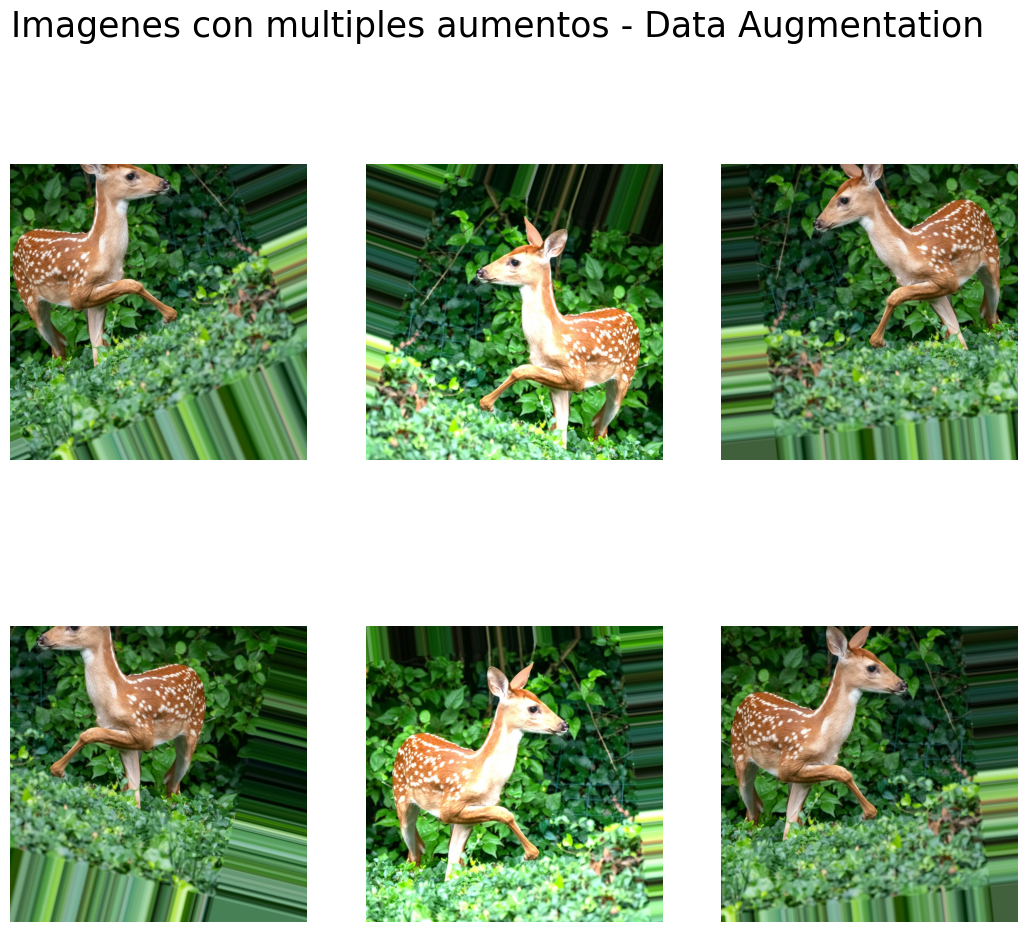

In [14]:
augmented_images = glob.glob('output_multiple/{}_*.jpg'.format(PREFIX))
augmented_images
plt.figure(figsize=(13,11))
plt.suptitle('Imagenes con multiples aumentos - Data Augmentation'.format(PREFIX), fontsize=25)
for i in range(len(augmented_images)):
    plt.subplot(2,3,i+1)
    image = load_img(augmented_images[i])
    image = img_to_array(image)
    image = image.astype('uint8')
    plt.axis('off')
    plt.imshow(image)
plt.savefig('output_multiple/Display_{}_images.jpg'.format(PREFIX))
plt.show()